### Task 
1. Import scipy.stats, numpy, pandas, matplotlib.pyplot, and math

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stat
import math
%matplotlib inline

### Task
1. Read 'minimum_temperature.csv'.
2. Check it out with the skills you've learned, like head(), tail(), groupby(),.....

In [2]:
df = pd.read_csv('minimum_temperature.csv')
df.head()

,date,min_temp
0,1/1/81,20.7
1,1/2/81,17.9
2,1/3/81,18.8
3,1/4/81,14.6
4,1/5/81,15.8


In [3]:
df.drop([3650,3651],inplace=True)

In [7]:
df['date'] = pd.to_datetime(df['date'],format = '%m/%d/%y')

In [6]:
df['min_temp'] = pd.to_numeric(df['min_temp'], errors = 'coerce')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3650 entries, 0 to 3649
Data columns (total 2 columns):
date        3650 non-null datetime64[ns]
min_temp    3650 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 85.5 KB


In [96]:
df.groupby([df['date'].dt.strftime('%Y').rename('year'),df['date'].dt.strftime('%m').rename('month')])['min_temp'].agg([min,'mean'])

min       mean
year month                 
1981 01     12.1  17.712903
     02     13.7  17.678571
     03      8.0  13.500000
     04      7.4  12.356667
     05      2.1   9.490323
     06      2.5   7.306667
     07      3.2   7.577419
     08      3.0   7.238710
     09      6.3  10.143333
     10      5.6  10.087097
     11      7.6  11.890000
     12      9.7  13.680645
1982 01     12.5  16.567742
     02     10.4  15.921429
     03      9.0  14.935484
     04      6.9  11.470000
     05      3.7   9.583871
     06      0.0   5.606667
     07      0.2   4.641935
     08      2.2   7.903226
     09      3.6   7.280000
     10      4.7   9.545161
     11      6.9  12.486667
     12     10.3  13.754839
1983 01      9.1  13.180645
     02     12.8  16.807143
     03     10.0  15.777419
     04      5.7  10.596667
     05      4.6  10.116129
     06      1.5   6.600000
...          ...        ...
1988 07      4.9   8.232258
     08      3.9   8.725806
     09      4.7   9.883333
     10      5.6  10.890323
     11      7.2  12.253333
     12      9.5  15.436667
1989 01      9.5  15.180645
     02     13.0  16.371429
     03      9.4  15.803226
     04      8.3  12.563333
     05      5.2  10.725806
     06      0.5   6.560000
     07      1.6   6.332258
     08      3.7   6.770968
     09      5.0   8.486667
     10      5.1   9.867742
     11      8.1  12.876667
     12     10.4  13.951613
1990 01     10.7  15.577419
     02     12.0  15.417857
     03      9.2  14.835484
     04      8.9  13.433333
     05      4.5   9.748387
     06      3.7   7.720000
     07      4.4   8.183871
     08      2.1   7.825806
     09      3.0   9.166667
     10      6.0  11.345161
     11      8.3  12.656667
     12     10.0  14.367742

[120 rows x 2 columns]

### Task
1. Draw histogram for min_temp and probability density function over it.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

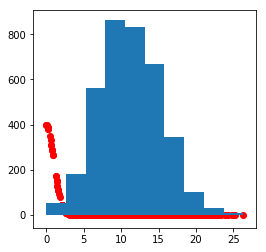

In [87]:
plt.figure(figsize=(4,4))
plt.hist(df['min_temp'])
plt.scatter(df['min_temp'],stat.norm.pdf(df['min_temp'])*1000,color='r')
plt.show()

### Task
1. Convert the raw data into z-scores.
2. Then try hist() and pdf() again.
3. Then, cdf().

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

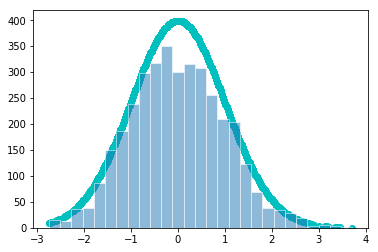

In [83]:
zscore = stat.zscore(df['min_temp'])
prob = stat.norm.pdf(zscore)


plt.scatter(zscore,prob*1000,color = 'c')
plt.hist(zscore,27,alpha=.5,edgecolor='white')
plt.show()

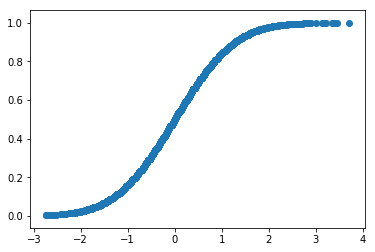

In [84]:
cum_prob = stat.norm.cdf(zscore)
plt.scatter(zscore,cum_prob)

### Extra
1. Check normality for the 'min_temp'. Is it normally distribution?

In [88]:
stat.shapiro(df['min_temp'])

(0.9973800182342529, 6.523597676277859e-06)

In [89]:
stat.normaltest(df['min_temp'])

NormaltestResult(statistic=18.440986327745456, pvalue=9.898985737133437e-05)

In [90]:
stat.anderson(df['min_temp'])

AndersonResult(statistic=1.9318294725135274, critical_values=array([0.575, 0.655, 0.786, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

### Task
1. Find pop_mean, sample_mean.
2. z for two-tailed at 95% for sample.
3. Plot the pdf of sample.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

##### Expected outcome

pop_mean: 170.01 

sample_mean: 170.78 

z: 1.96

pop_mean: 43.01 
sample_mean: 43.30 
Z: 1.96


<function matplotlib.pyplot.show(*args, **kw)>

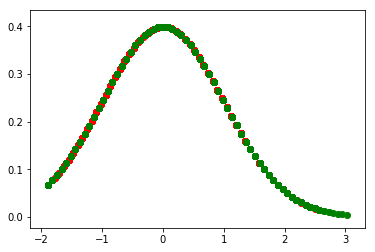

In [108]:
# Given
np.random.seed(41)
population_1 = stat.poisson.rvs(loc=18, mu=35, size=150000)
population_2 = stat.poisson.rvs(loc=18, mu=10, size=100000)
population = np.concatenate((population_1, population_2))
sample = np.random.choice(a= population, size = 3000)

# your code here
pop_mean = np.mean(population)
sample_mean = np.mean(sample)
Z = stat.norm.ppf(.975)

print('pop_mean: %.2f \nsample_mean: %.2f \nZ: %.2f'%(pop_mean,sample_mean,Z))

z_score_s = stat.zscore(sample)
z_score_p = stat.zscore(population)

prob_s = stat.norm.pdf(z_score_s)
prob_p = stat.norm.pdf(z_score_p)

plt.scatter(z_score_s,prob_s,color='r')
plt.scatter(z_score_p,prob_p,color='g')
plt.show

## Statistical significance

## Confidence interval
### Task
1. Find the confidence interval of the sample for two-tailed at 95% and 90%.
2. Compare the results.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.describe.html

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

In [111]:
stat.norm.interval(.95)

(-1.959963984540054, 1.959963984540054)

In [112]:
stat.norm.interval(.975)

(-2.241402727604945, 2.241402727604947)

In [120]:
n,min_max,mean,var,_,_=stat.describe(sample)
stdev = math.sqrt(var)
interval_025 = stat.norm.interval(.975, mean, stdev)
interval_025

(13.988559358211333, 72.60277397512203)

In [118]:
interval_05 = stat.norm.interval(.95, mean, stdev)
interval_05

(17.668467186543968, 68.92286614678937)